# Analiza zawartości serwisu StackOverflow


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Analiza użytkowników StackOverflow
## 1.1 Analiza liczby utworzonych kont

In [0]:
query3 = """SELECT
  EXTRACT(YEAR FROM creation_date) AS Year,
  COUNT(*) AS Created_Account
FROM
  `bigquery-public-data.stackoverflow.users` 
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year"""

In [0]:
df_count = pd.read_gbq(query = query3, project_id = 'just-tracer-241713', dialect = 'standard')

In [9]:
df_count.set_index('Year')

,Created_Account
Year,
2009,78121
2010,199458
2011,359295
2012,680175
2013,1124859
2014,1177982
2015,1256515
2016,1521332
2017,1733857


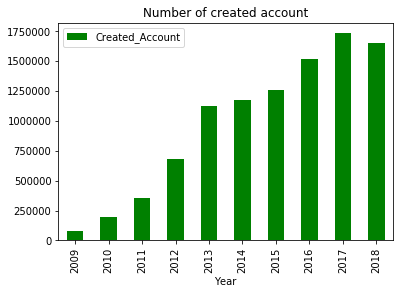

In [10]:
df_count[0:10].set_index('Year').plot(kind = 'bar', color = ['green'], title = 'Number of created account')

Na podstawie otrzymanych analiz można zaobserwować znaczny wzrost utworzonych kont na portalu, a co za tym idzie liczbę jego użytkowników. Najwiekszy przyrost miał miejsce miedzy 2012 a 2013 rokiem, gdzie liczba użytkowników wzrosła do ponad miliona. Następnie dalej wzrastała aż do 2017 roku, gdzie osiągneła największą wartość. Od roku 2018 obserwuję sie nieznaczy spadek ilości utworzonych kont.

## **1.2 Analiza ilości odpowiedzi**

 Odpowiedzi z podziałem na lata oraz procent odpowiedzi wraz z komentarzami

In [0]:
query1 = """SELECT 
EXTRACT(YEAR FROM posts_answers.creation_date) AS Year,
  COUNT(*) AS Number_of_Answers,
  ROUND(100 * SUM(IF(comment_count > 0, 1, 0)) / COUNT(*), 1) AS Percent_Answers_with_Comments
FROM
  `bigquery-public-data.stackoverflow.posts_answers` posts_answers
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year; """

In [0]:

df = pd.read_gbq(query = query1, project_id = 'just-tracer-241713', dialect = 'standard')

In [4]:
df.set_index('Year')

,Number_of_Answers,Percent_Answers_with_Comments
Year,,
2009,941435,49.2
2010,1466906,52.9
2011,2277230,53.6
2012,2836010,54.0
2013,3331821,52.4
2014,3211582,50.6
2015,3158846,49.9
2016,3090999,48.7
2017,2928426,47.0


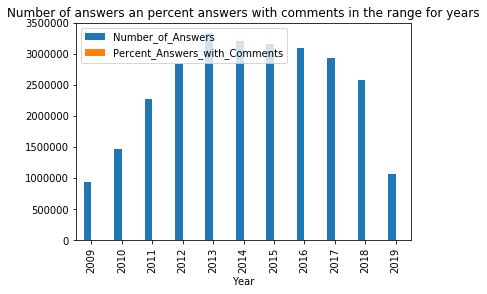

In [5]:
df[0:11].set_index('Year').plot(kind = 'bar', title = 'Number of answers an percent answers with comments in the range for years')

Na wykresie można zauważyć stały wzrost liczby udzielanych odpowiedzi. Największy wzrost miał miejsce w 2013 roku, po tym czasie widać już nieznaczy spadek. Wciąż jednak można zaobserwować znaczne zainteresowanie użytkowników udzielaniem odpowiedzi na pojawiające się pytania.

## **1.3 Aktywność w udzielaniu odpowiedzi**

Aktywność odpowiedzi w stosunku do daty ostatniej aktywności

In [0]:
query2 = """SELECT
  EXTRACT(YEAR FROM last_activity_date) AS Year,
  COUNT(*) AS Activity
FROM
  `bigquery-public-data.stackoverflow.posts_answers`
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year; """

In [0]:
df2 = pd.read_gbq(query = query2, project_id = 'just-tracer-241713', dialect = 'standard')

In [49]:
df2.columns = ['Year', 'Activity']
df2.head()

,Year,Activity
0,2009,872251
1,2010,1378147
2,2011,2181060
3,2012,2771188
4,2013,3283833


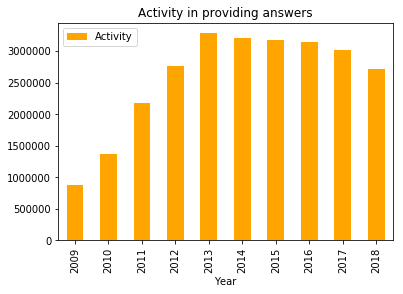

In [54]:
df2[0:10].set_index('Year').plot(kind = 'bar', color = ['orange'], title = 'Activity in providing answers')

Na podstawie dat ostatnich logowań do serwisu można częściowo oszacować aktywność użytkowników w udzielaniu odpowiedzi. Widać, że największy wzrost miał miejsce w 2013 roku,  ponad 3 mln użytkowników. Od roku 2014 obserwuje się nieznaczny spadek, lecz wciąż utrzymujący sie na wysokim poziomie, który świadczy o wysokim zaangażaowaniu użytkowników w udzielaniu odpowiedzi i komentarzy. 

# 2. Analiza użytkowników będacych studentami
## 2.1 Ilość użytkowników, którzy w opisie podali status studenta

In [0]:
query4 = """SELECT about_me,
  COUNT(*) AS Users_student
FROM
  `bigquery-public-data.stackoverflow.users`
WHERE about_me LIKE '%student%' OR about_me like '%Student%'
GROUP BY
  about_me
ORDER BY
  Users_student DESC, about_me DESC"""

In [0]:
df_stud = pd.read_gbq(query = query4, project_id = 'just-tracer-241713', dialect = 'standard')

In [17]:
df_stud.head()

,about_me,Users_student
0,<p>Student</p>,953
1,<p>student</p>,294
2,<p>Computer Science Student</p>,168
3,<p>Student.</p>,151
4,<p>Computer Science student</p>,123


In [18]:
df_stud['Users_student'].sum()

65205

Ilość osób, która zadeklarowała bycie studentem jest znaczna i wynosi ponad 60 tysięcy użytkowników. Jednak osób ze statusem studenta, bądź uczących się może być w serwisie znacznie więcej, ponieważ nie każdy mógł zaznaczyć w opisie swój status. Pokazuje to również, iż znacznie częściej użytkownikami portalu są nie tylko osoby już pracujące na co dzień z danymi technologiami lecz także studenci i osoby dopiero uczące się. 

## 2.2 Aktywność studentów w serwisie

Aktywność rozumiana jako data ostatniego logowania do serwisu

In [0]:
query5 = """SELECT
  EXTRACT(YEAR FROM last_access_date) AS Year,
  COUNT(*) AS Students_Activity
FROM
  `bigquery-public-data.stackoverflow.users`
WHERE about_me LIKE '%student%' OR about_me like '%Student%'
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year"""

In [0]:
df_stud2 = pd.read_gbq(query = query5, project_id = 'just-tracer-241713', dialect = 'standard')

In [72]:
df_stud2.columns = ['Year', 'Students Activity']
df_stud2.head(10)

,Year,Students Activity
0,2009,50
1,2010,160
2,2011,326
3,2012,831
4,2013,1993
5,2014,3511
6,2015,4526
7,2016,4464
8,2017,6725
9,2018,11707


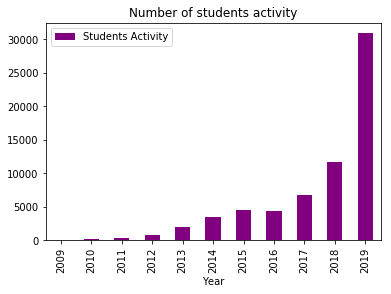

In [74]:
df_stud2[0:11].set_index('Year').plot(kind = 'bar', color = ['purple'], title = 'Number of students activity')


Aktywność studentów można oszacować na podstawie dat ostatnich logowań do serwisu. Widać, że aktywność studentów na portalu sukcesywnie wzrastała od kilku lat, jednak największy wzrost obserwuję się od roku 2018, gdzie liczba użytkowników wzrosła dwukrotnie oraz w pierwszym kwartale 2019 roku, gdzie wzrosła równiż dwukrotnie w stosunku do poprzedniego roku.

## 2.3 Analiza pytań i odpowiedzi studentów

Ilość zadawanych przez studentów pytań oraz ich odpowiedzi w ujęciu czasowym

In [0]:
query6 = """SELECT 
EXTRACT(YEAR FROM posts_questions.creation_date) AS Year,
  COUNT(*) AS Number_of_Questions,
  SUM(answer_count) AS Number_of_Answers
FROM
  `bigquery-public-data.stackoverflow.posts_questions` posts_questions
JOIN
  `bigquery-public-data.stackoverflow.users` users
ON posts_questions.owner_user_id = users.id
WHERE users.about_me like '%student%' OR users.about_me like '%Student%'
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year
"""

In [0]:
df_stud3 = pd.read_gbq(query = query6, project_id = 'just-tracer-241713', dialect = 'standard')

In [27]:
df_stud3.set_index('Year')

,Number_of_Questions,Number_of_Answers
Year,,
2009,2966,10755
2010,7759,20697
2011,13294,29954
2012,23783,46612
2013,30348,52925
2014,35082,53307
2015,40899,58259
2016,39741,54043
2017,39019,50345


Text(0.5, 1.0, 'Number of questions and answers asked by students')

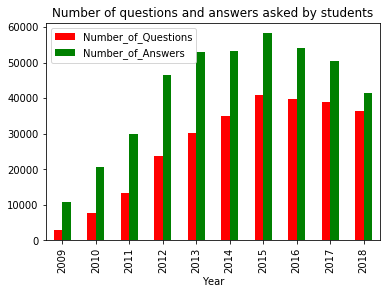

In [28]:
df_stud3[0:10].set_index('Year').plot(kind = 'bar', color = ['red', 'green'])
plt.title('Number of questions and answers asked by students')

Wraz ze wzrostem ilości użytkowników deklarujacych status  studenta, wzrasta ilość zadawanych przez nich pytań oraz ilość udzielanych odpowiedzi. Największy przyrost zadawanych pytań można zauważyć pomiedzy 2012 a 2015 rokiem wraz ze wzrostem udzielonych na nie odpowiedzi. Od 2016 roku obserwuje się spadek ilości zadawanych pytań oraz ilości udzielanych odpowiedzi (zmalala znacznie więcej, niż ilość zadawanych pytań). Można stwierdzić, iż aktywność studentów w zdawaniu pytań utrzymuję się na stosunkowo stałym poziomie, natomiast aktywnośc w udzielaniu odpowiedzi dość wyraźnie spada.

## 2.4 Najpopularniejsze tagi wśród studentów
### 2.4.1 Według zadawanych pytań

In [0]:
query7 = """SELECT
EXTRACT(YEAR FROM posts_questions.creation_date) AS Year, owner_user_id, tags
FROM 
    `bigquery-public-data.stackoverflow.posts_questions` posts_questions
JOIN
  `bigquery-public-data.stackoverflow.users` users
ON posts_questions.owner_user_id = users.id
WHERE users.about_me like '%Student%' OR users.about_me like '%student%'
ORDER BY
  Year ASC
"""

In [0]:
df3 = pd.read_gbq(query = query7, project_id = 'just-tracer-241713', dialect = 'standard')

In [32]:
df3.set_index('Year').head()

,owner_user_id,tags
Year,,
2008,12722,asp.net|exception-handling|web|httpunhandledex...
2008,1288,c++|string|double
2008,396,css|printing
2008,1288,java|comparison|versioning
2008,47438,java|swing|jpanel|jlist


In [0]:
stud = pd.DataFrame(df3.tags.str.split('|').tolist(), index=df3.Year).stack()

In [34]:
stud.head()

Year   
2008  0                   asp.net
      1        exception-handling
      2                       web
      3    httpunhandledexception
      0                       c++
dtype: object

In [35]:
stud2 = stud.reset_index([0, 'Year'])
stud2.head()

,Year,0
0,2008,asp.net
1,2008,exception-handling
2,2008,web
3,2008,httpunhandledexception
4,2008,c++


In [36]:
stud2.columns = ['Year', 'tag']
stud2.head()

,Year,tag
0,2008,asp.net
1,2008,exception-handling
2,2008,web
3,2008,httpunhandledexception
4,2008,c++


In [37]:
#Ilość powtórzeń każdego taga
tag_stud = stud2.tag.value_counts()
tag_stud.head(15)

python        31401
java          31030
javascript    26209
android       20314
c#            20245
c++           18063
php           16310
html          13708
jquery        10515
c              9753
r              9154
css            8665
mysql          7754
ios            7639
arrays         6716
Name: tag, dtype: int64

In [38]:
# Ilość tagów
stud2.tag.nunique()

26181

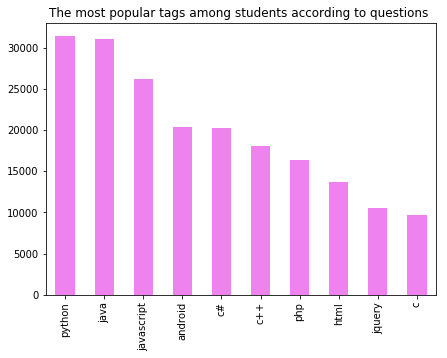

In [71]:
tag_stud.head(10).plot(kind = 'bar', color = ['violet'], title = 'The most popular tags among students according to questions ', figsize = [7,5])

Najczęściej pojawiającymi się tagami według zadawanych przez studentów pytań są  tagi dotyczące języków *Python*, *Jav*a oraz *JavaScript*. Kolejnymi równie popularnymi są *Android*, *C#* oraz *C++*.  Widać, że pośród studentów najpopularniejszymi językami są *Python* i *Java* i to właśnie o nie najczęściej pytaja studenci.

### 2.4.2 Według tagów

In [0]:
query8 = """SELECT tag_name, count
FROM `bigquery-public-data.stackoverflow.tags` tags
JOIN
  `bigquery-public-data.stackoverflow.users` users
ON tags.id = users.id
WHERE users.about_me like '%Student%' OR users.about_me like '%student%'
ORDER BY
  count DESC
"""

In [0]:
df_tag2 = pd.read_gbq(query = query8, project_id = 'just-tracer-241713', dialect = 'standard')

In [64]:
df_tag2.columns = ['Tag name', 'count']
df_tag2.head(10)

,Tag name,count
0,parameters,16796
1,location,8144
2,google-play-services,6374
3,command-line-interface,5796
4,maven-2,5565
5,vectorization,4268
6,lxml,4108
7,sprite,4094
8,user-defined-functions,3066
9,iphone-sdk-3.0,2793


Text(0.5, 1.0, 'The most popular tags among students by tags')

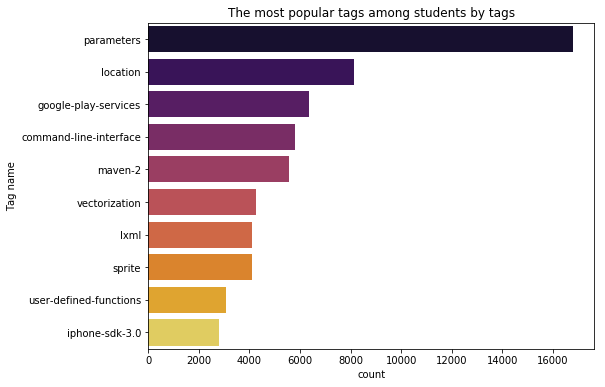

In [68]:
plt.figure(figsize = (8,6))
sns.barplot(y = 'Tag name', x = 'count', data = df_tag2.head(10), palette = 'inferno')
plt.title('The most popular tags among students by tags')

Najczęściej tagowane przez studentów sa hasła takie jak *parameters* oraz kolejno *location * i *google-play-services*. Padaja najczęsciej hasła związane programowaniem, linią komend oraz najnowszymi technologiami.